<a href="https://colab.research.google.com/github/RianaAzad/Panda-practice/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install tld

In [73]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [74]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [75]:
#Loading Dataset
data = pd.read_csv("data-2.csv")

In [76]:
cleaned_data = data.dropna(axis=1)

In [77]:
data.isnull().sum()

url      0
label    0
dtype: int64

In [78]:
count = data.label.value_counts()
count

benign        400556
malicious      46772
defacement      9216
phishing        2046
malware          755
Name: label, dtype: int64

In [79]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,label
0,https://wn.com/Bloc_Québécois,benign
1,https://wn.com/Block_Communications,benign
2,https://wn.com/Blue_Bonnets_Raceway,benign
3,https://wn.com/Blue_John_Canyon,benign
4,https://wn.com/Blue_Ridge_Mall,benign
...,...,...
459340,zoominfo.com/people/Mackell_Cheryl_191054707.aspx,benign
459341,zoominfo.com/people/Mackinnon_Edwina_758127954...,benign
459342,zoominfo.com/people/Madden_Norah_1216143393.aspx,benign
459343,zoominfo.com/people/Mankiewicz_Christopher_368...,benign


In [80]:
rem = {"label": {"benign": 0, "malicious": 1, "defacement":2, "phishing":3, "malware":4}}
data['Category'] = data['label']
data = data.replace(rem)
data.head(20)

,url,label,Category
0,https://wn.com/Bloc_Québécois,0,benign
1,https://wn.com/Block_Communications,0,benign
2,https://wn.com/Blue_Bonnets_Raceway,0,benign
3,https://wn.com/Blue_John_Canyon,0,benign
4,https://wn.com/Blue_Ridge_Mall,0,benign
5,https://wn.com/Bluffton_University,0,benign
6,https://wn.com/Bob_Backlund,0,benign
7,https://wn.com/Bob_Campbell_(photographer),0,benign
8,https://wn.com/Bob_Geigel,0,benign
9,https://wn.com/Bobby_Dollas,0,benign


In [81]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [82]:
data.head()

,url,label,Category,url_len
0,https://wn.com/Bloc_Québécois,0,benign,29
1,https://wn.com/Block_Communications,0,benign,35
2,https://wn.com/Blue_Bonnets_Raceway,0,benign,35
3,https://wn.com/Blue_John_Canyon,0,benign,31
4,https://wn.com/Blue_Ridge_Mall,0,benign,30


Feature Extraction

In [83]:
def process_tld(url):
    try:
#         Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [84]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [85]:
data.tail()

,url,label,Category,url_len,domain
459340,zoominfo.com/people/Mackell_Cheryl_191054707.aspx,0,benign,49,zoominfo.com
459341,zoominfo.com/people/Mackinnon_Edwina_758127954...,0,benign,51,zoominfo.com
459342,zoominfo.com/people/Madden_Norah_1216143393.aspx,0,benign,48,zoominfo.com
459343,zoominfo.com/people/Mankiewicz_Christopher_368...,0,benign,57,zoominfo.com
459344,zoominfo.com/people/Mankiewicz_Contessa_114083...,0,benign,55,zoominfo.com


In [86]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [87]:
data.tail()

,url,label,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
459340,zoominfo.com/people/Mackell_Cheryl_191054707.aspx,0,benign,49,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0
459341,zoominfo.com/people/Mackinnon_Edwina_758127954...,0,benign,51,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0
459342,zoominfo.com/people/Madden_Norah_1216143393.aspx,0,benign,48,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0
459343,zoominfo.com/people/Mankiewicz_Christopher_368...,0,benign,57,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0
459344,zoominfo.com/people/Mankiewicz_Contessa_114083...,0,benign,55,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0


In [88]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [89]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

In [90]:
data.tail()

,url,label,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
459340,zoominfo.com/people/Mackell_Cheryl_191054707.aspx,0,benign,49,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
459341,zoominfo.com/people/Mackinnon_Edwina_758127954...,0,benign,51,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
459342,zoominfo.com/people/Madden_Norah_1216143393.aspx,0,benign,48,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
459343,zoominfo.com/people/Mankiewicz_Christopher_368...,0,benign,57,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
459344,zoominfo.com/people/Mankiewicz_Contessa_114083...,0,benign,55,zoominfo.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0


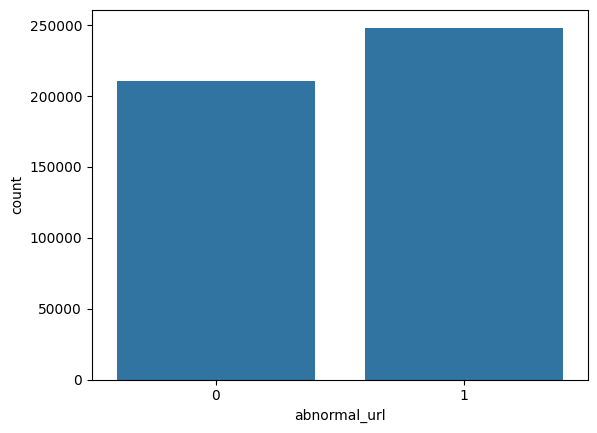

In [91]:
sns.countplot(x='abnormal_url', data=data);

In [92]:
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl ,
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [93]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

In [94]:
data.head(20)

,url,label,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,https://wn.com/Bloc_Québécois,0,benign,29,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
1,https://wn.com/Block_Communications,0,benign,35,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
2,https://wn.com/Blue_Bonnets_Raceway,0,benign,35,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
3,https://wn.com/Blue_John_Canyon,0,benign,31,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
4,https://wn.com/Blue_Ridge_Mall,0,benign,30,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
5,https://wn.com/Bluffton_University,0,benign,34,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
6,https://wn.com/Bob_Backlund,0,benign,27,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
7,https://wn.com/Bob_Campbell_(photographer),0,benign,42,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
8,https://wn.com/Bob_Geigel,0,benign,25,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
9,https://wn.com/Bobby_Dollas,0,benign,27,wn.com,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1


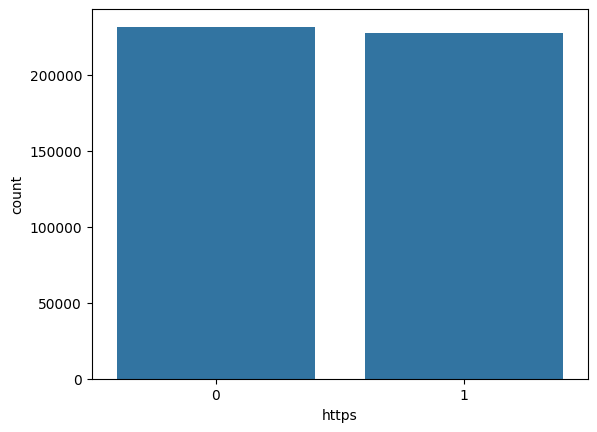

In [95]:
sns.countplot(x='https', data=data);

In [96]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [97]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [98]:
data.head()

,url,label,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,https://wn.com/Bloc_Québécois,0,benign,29,wn.com,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
1,https://wn.com/Block_Communications,0,benign,35,wn.com,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
2,https://wn.com/Blue_Bonnets_Raceway,0,benign,35,wn.com,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,https://wn.com/Blue_John_Canyon,0,benign,31,wn.com,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
4,https://wn.com/Blue_Ridge_Mall,0,benign,30,wn.com,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0


In [99]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [100]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [101]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [102]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

In [103]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [104]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [105]:
data.head()

,url,label,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,https://wn.com/Bloc_Québécois,0,benign,29,wn.com,0,0,0,0,1,...,0,0,0,1,1,1,0,23,0,0
1,https://wn.com/Block_Communications,0,benign,35,wn.com,0,0,0,0,1,...,0,0,0,1,1,1,0,29,0,0
2,https://wn.com/Blue_Bonnets_Raceway,0,benign,35,wn.com,0,0,0,0,1,...,0,0,0,1,1,1,0,28,0,0
3,https://wn.com/Blue_John_Canyon,0,benign,31,wn.com,0,0,0,0,1,...,0,0,0,1,1,1,0,24,0,0
4,https://wn.com/Blue_Ridge_Mall,0,benign,30,wn.com,0,0,0,0,1,...,0,0,0,1,1,1,0,23,0,0


In [106]:
data['having_ip_address'].value_counts()

0    458989
1       356
Name: having_ip_address, dtype: int64

<ipython-input-110-229ec2d9fac1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5)


<Axes: >

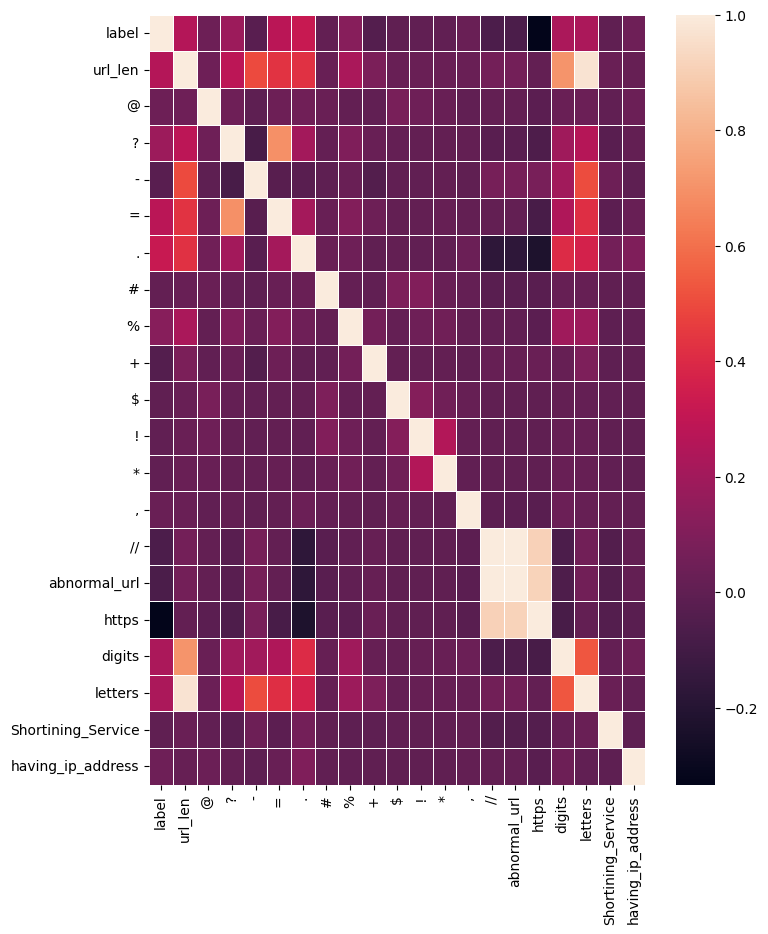

In [110]:
plt.figure(figsize=(8, 10))
sns.heatmap(data.corr(), linewidths=.5)

In [129]:
X = data.drop(['url','label','Category','domain'],axis=1)#,'type_code'
y = data['label']

In [130]:
X

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,29,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,23,0,0
1,35,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,29,0,0
2,35,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,28,0,0
3,31,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,24,0,0
4,30,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459340,49,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,34,0,0
459341,51,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,36,0,0
459342,48,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,10,32,0,0
459343,57,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,42,0,0


Train and Test Split

In [131]:
y

0         0
1         0
2         0
3         0
4         0
         ..
459340    0
459341    0
459342    0
459343    0
459344    0
Name: label, Length: 459345, dtype: int64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [133]:
X_train

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
110241,22,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,19,0,0
156293,31,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,26,0,0
152213,157,0,1,9,5,3,0,0,0,0,0,0,0,1,1,0,12,116,0,0
7970,59,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,51,0,0
284478,51,0,1,0,2,1,0,0,0,0,0,0,0,1,1,1,7,35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437782,41,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,6,29,0,0
95816,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,23,0,0
203245,86,0,0,9,0,1,0,0,0,0,0,0,0,1,1,1,10,59,0,0
100879,16,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,12,0,0


In [134]:
X_test

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
116353,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,28,0,0
12145,62,0,0,3,0,2,0,0,0,0,0,0,0,1,1,1,5,45,0,0
162796,56,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,48,0,0
172497,41,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,34,0,0
302986,50,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,3,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342379,55,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,46,0,0
437049,26,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,21,0,0
37867,106,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,67,34,0,0
121832,59,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,12,38,0,0


In [135]:
y_train

110241    0
156293    0
152213    2
7970      0
284478    0
         ..
437782    0
95816     0
203245    0
100879    0
351400    0
Name: label, Length: 367476, dtype: int64

In [136]:
y_test

116353    0
12145     0
162796    0
172497    0
302986    0
         ..
342379    0
437049    0
37867     1
121832    0
89665     0
Name: label, Length: 91869, dtype: int64

ML **Model**

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Features and target variable
X = data[['url_len', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//', 'abnormal_url', 'https', 'digits', 'letters', 'Shortining_Service']]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Assuming 4 categories

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/10
9187/9187 [==============================] - 26s 3ms/step - loss: 0.2152 - accuracy: 0.9348 - val_loss: 0.1720 - val_accuracy: 0.9453
Epoch 2/10
9187/9187 [==============================] - 27s 3ms/step - loss: 0.1852 - accuracy: 0.9418 - val_loss: 0.1679 - val_accuracy: 0.9459
Epoch 3/10
9187/9187 [==============================] - 25s 3ms/step - loss: 0.1817 - accuracy: 0.9423 - val_loss: 0.1656 - val_accuracy: 0.9465
Epoch 4/10
9187/9187 [==============================] - 26s 3ms/step - loss: 0.1798 - accuracy: 0.9433 - val_loss: 0.1662 - val_accuracy: 0.9462
Epoch 5/10
9187/9187 [==============================] - 28s 3ms/step - loss: 0.1785 - accuracy: 0.9434 - val_loss: 0.1637 - val_accuracy: 0.9472
Epoch 6/10
9187/9187 [==============================] - 23s 2ms/step - loss: 0.1771 - accuracy: 0.9436 - val_loss: 0.1634 - val_accuracy: 0.9467
Epoch 7/10
9187/9187 [==============================] - 23s 2ms/step - loss: 0.1762 - accuracy: 0.9440 - val_loss: 0.1624 - val_ac

2871/2871 [==============================] - 6s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


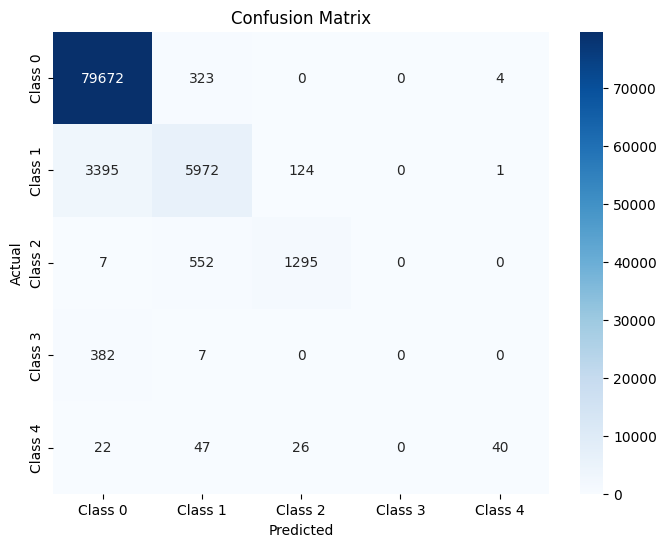

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     79999
           1       0.87      0.63      0.73      9492
           2       0.90      0.70      0.79      1854
           3       0.00      0.00      0.00       389
           4       0.89      0.30      0.44       135

    accuracy                           0.95     91869
   macro avg       0.72      0.52      0.59     91869
weighted avg       0.94      0.95      0.94     91869



In [140]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Classification Report
class_report = classification_report(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display Classification Report
print("Classification Report:\n", class_report)

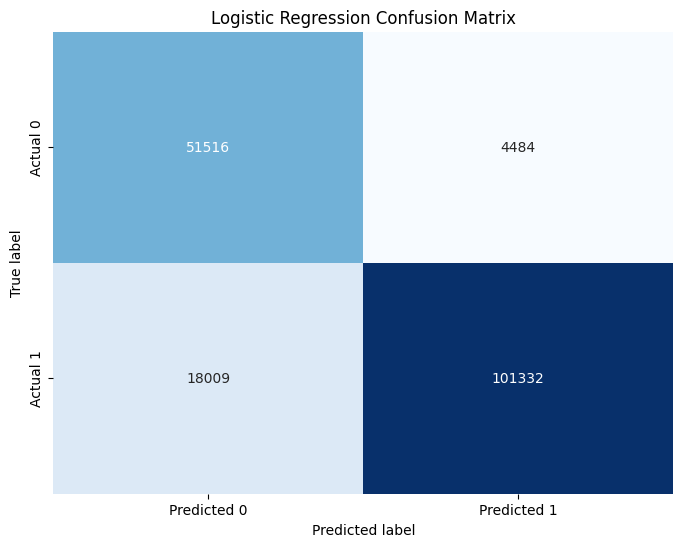

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Logistic Regression confusion matrix
conf_matrix_log = [[51516, 4484], [18009, 101332]]

# Create a heatmap for Logistic Regression confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


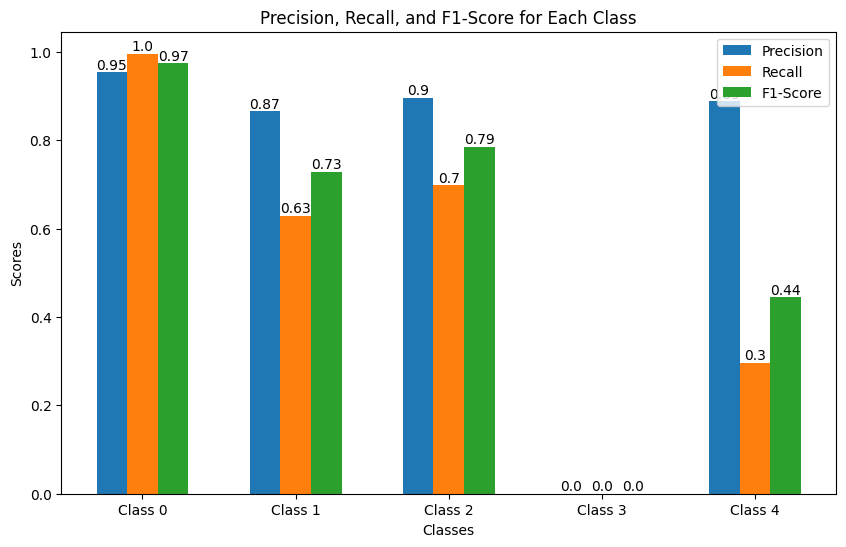

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Assuming you have the true labels (y_test) and predicted labels (y_pred_classes)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)

# Labels for each class
class_labels = [f'Class {i}' for i in range(len(precision))]

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_labels))

bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_labels)
ax.legend()

# Display the values on top of the bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()